In [135]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import logging
from time import time

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA



# Loading Digits dataset and getting the insight


In [91]:
# Load Digits dataset

digits = load_digits()
features = digits.feature_names

data, labels = load_digits(return_X_y = True)
(n_samples, n_features), n_digits = df.shape, np.unique(labels).size

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# the label to predict is the number of digit
y = digits.target
target_names = digits.target_names
n_classes = digits.target_names.shape[0]

df = pd.DataFrame(data = digits.data,columns = features)
df['target'] = digits.target

target_names = np.unique(df.target)
n_classes = target_names.shape[0]

print(f"# classes: {n_classes}; # digits: {n_digits}; # samples: {n_samples}; # features {n_features}; # shape {df.shape}")
# or
print(target_names)
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

print(df.info())
print(digits.DESCR)


# classes: 10; # digits: 10; # samples: 1797; # features 65; # shape (1797, 65)
[0 1 2 3 4 5 6 7 8 9]
Total dataset size:
n_samples: 1797
n_features: 65
n_classes: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  p

# Setup classification pipeline and the metrics


## a) Using complete dataset without PCA dimension reduction


X_train size: (1347, 64)
X_test size: (450, 64)
y_train size: (1347,)
y_test size: (450,)
Fitting the classifier to the training set
done in 28.199s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)
Predicting digit numbers on the test set
done in 0.022s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      0.98      0.99        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
we

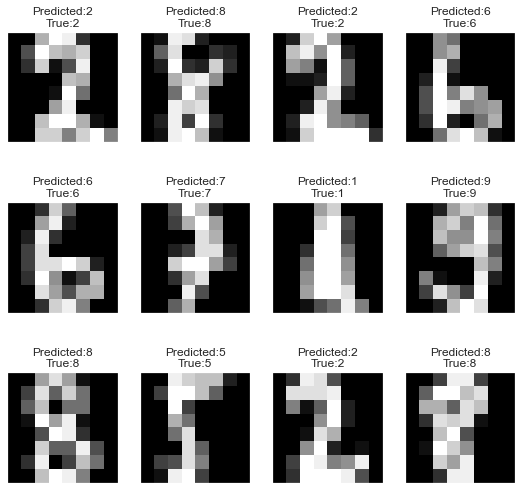

In [101]:
#################################################### Without PCA #################################################

# Split data into train/test #####################################################################################

X = df.drop(columns = ['target']).values

y = df.get(['target']).values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Second way to split data into train/test

#X_train, X_test, y_train, y_test = train_test_split(
#    df, digits.target, test_size=0.5, shuffle=False)


print(f"X_train size: {X_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_train size: {y_train.shape}")
print(f"y_test size: {y_test.shape}")

# Train a SVM/SVC classification model ###########################################################################

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# Quantitative evaluation of the model quality on the test set ###################################################

print("Predicting digit numbers on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9]))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# Visualize some of your test results ############################################################################

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((8,8)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_test[i]]
    return 'Predicted:{}\nTrue:{}'.format(pred_name, true_name)


prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles)

plt.show()



## b) Using complete dataset with applying PCA dimension reduction


X_train size: (1347, 64)
X_test size: (450, 64)
y_train size: (1347,)
y_test size: (450,)
Extracting the top 27 digits from 1347 handwrittings
done in 0.007s
Projecting the input data on the digits orthonormal basis
done in 0.000s
Fitting the classifier to the training set
done in 11.136s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)
Predicting digit numbers on the test set
done in 0.016s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.98      0.97        43
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.94      0.96        48
           9       0.96  

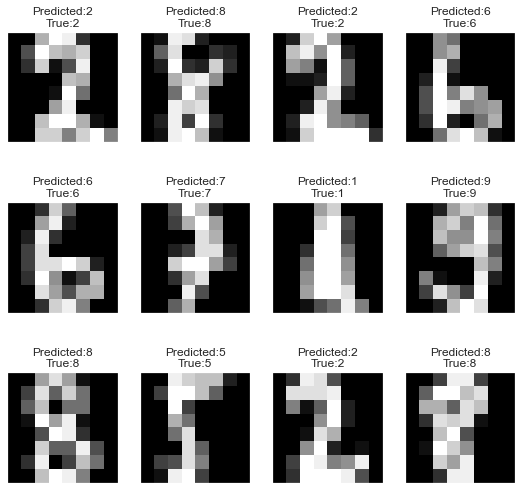

In [100]:
######################################### Adding PCA for dimension reduction ######################################

# Split data into train/test ######################################################################################

X = df.drop(columns = ['target']).values

y = df.get(['target']).values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(f"X_train size: {X_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_train size: {y_train.shape}")
print(f"y_test size: {y_test.shape}")


n_components = 27   # Minimun n that gives the same good result like as without PCA is #27. Max numbers of components is 64 

print("Extracting the top %d digits from %d handwrittings"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

#eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the digits orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# Train a SVM/SVC classification model ############################################################################

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

# Create a classifier: a support vector classifier

clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# Quantitative evaluation of the model quality on the test set ####################################################

print("Predicting digit numbers on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9]))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# Visualize some of your test results #############################################################################

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((8,8)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_test[i]]
    return 'Predicted:{}\nTrue:{}'.format(pred_name, true_name)


prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles)

plt.show()


## c) Using 10% of dataset with applying PCA dimension reduction


X_train size: (135, 64)
X_test size: (45, 64)
y_train size: (135,)
y_test size: (45,)
Extracting the top 25 digits from 135 handwrittings
done in 0.000s
Projecting the input data on the digits orthonormal basis
done in 0.000s
Fitting the classifier to the training set
done in 0.882s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)
Predicting digit numbers on the test set
done in 0.000s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         4
           2       0.88      1.00      0.93         7
           3       1.00      0.86      0.92         7
           4       1.00      1.00      1.00         5
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         8
           8       0.67      1.00      0.80         2
           9       0.83      1.

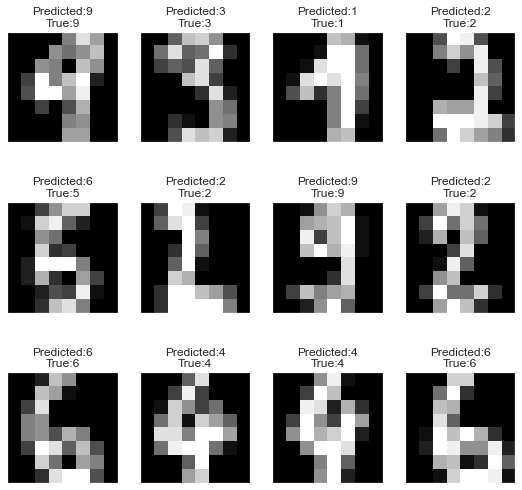

In [103]:
############################## Using %10 data and also adding PCA for dimension reduction #########################

# Taking %10 of data 

df_10 = df.sample(frac=0.1, replace=True, random_state=5)


# Split data into train/test ######################################################################################

X = df_10.drop(columns = ['target']).values

y = df_10.get(['target']).values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(f"X_train size: {X_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_train size: {y_train.shape}")
print(f"y_test size: {y_test.shape}")


n_components = 25   # Minimun n that gives almost the same good result like as without PCA is #25. Max numbers of components is 64

print("Extracting the top %d digits from %d handwrittings"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

#eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the digits orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# Train a SVM/SVC classification model ############################################################################

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# Quantitative evaluation of the model quality on the test set ####################################################

print("Predicting digit numbers on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9]))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# Visualize some of your test results #############################################################################

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((8,8)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_test[i]]
    return 'Predicted:{}\nTrue:{}'.format(pred_name, true_name)


prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles)

plt.show()


## c) Using 5% of dataset with applying PCA dimension reduction


X_train size: (67, 64)
X_test size: (23, 64)
y_train size: (67,)
y_test size: (23,)
Extracting the top 25 digits from 67 handwrittings
done in 0.000s
Projecting the input data on the digits orthonormal basis
done in 0.000s
Fitting the classifier to the training set


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


done in 0.470s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)
Predicting digit numbers on the test set
done in 0.000s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      0.67      0.80         6

    accuracy                           0.91        23
   macro avg       0.90      0.97      0.91        23
weighted avg       0.96      0.91      0.92        23

[[2 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 3 0 0

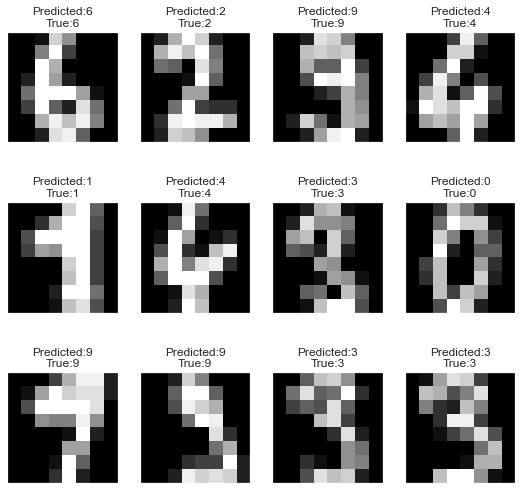

In [102]:
############################## Using %5 data and also adding PCA for dimension reduction ##########################

# Taking %5 of data 

df_5 = df.sample(frac=0.05, replace=True, random_state=5)


# Split data into train/test ######################################################################################

X = df_5.drop(columns = ['target']).values

y = df_5.get(['target']).values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(f"X_train size: {X_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_train size: {y_train.shape}")
print(f"y_test size: {y_test.shape}")


n_components = 25   # Minimun n that gives almost the same good result like as without PCA is #25. Max numbers of components is 64

print("Extracting the top %d digits from %d handwrittings"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

#eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the digits orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# Train a SVM/SVC classification model ############################################################################

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# Quantitative evaluation of the model quality on the test set ####################################################

print("Predicting digit numbers on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9]))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# Visualize some of your test results #############################################################################

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((8,8)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_test[i]]
    return 'Predicted:{}\nTrue:{}'.format(pred_name, true_name)


prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles)

plt.show()


# Results of Task (1): 

### Picking complete dataset will cause better SVC classification performance. Applying PCA to reduce
### n_features, or picking random portion of dataset cause some distraction in good result.
### However, changing PCA number of components and SVC parameters play important role to get better 
### resuls. Here, the best n_components, C , and Gamma parameters of SVC are introducesd in each section of
### code separately. 
